# Выборка и агрегация данных в MongoDB

###Цель домашней работы

Закрепить на практике основные приемы работы с СУБД MongoDB, включая выборку, сортировку, объединение, агрегацию данных и передачу результатов выборки в программу на Python в целях аналитики и дальнейшей обработки.

### Формулировка задания

В этом задании вам предстоит выполнить несколько запросов к базе данных для получения выборок по условиям, а также воспользоваться фреймворком агрегации MongoDB для построения конвейера обработки данных.

Максимальное количество баллов за выполнение домашней работы: 10.

##Что нужно использовать в работе над заданием

I. MongoDB:

1. Зарегистрируйтесь в сервисе MongoDB Atlas: https://www.mongodb.com/atlas/database.
1. Создайте кластер уровня M0 (это бесплатно).
1. Добавьте в кластер тестовую базу данных `sample_mflix`, используя опцию Load Sample Dataset.

В качестве альтернативы вы можете установить MongoDB на свой локальный компьютер и импортировать необходимые датасеты в свою СУБД, загрузив их по ссылке: https://github.com/neelabalan/mongodb-sample-dataset/tree/main/sample_mflix. Для этого подключитесь к своему серверу через Compass, создайте новую БД, создайте для каждого датасета коллекцию и щелкните «Add data» → «Import JSON or CSV file».

II. MongoDB Compass — в качестве вспомогательного инструмента для конструирования запросов и агрегаций.

III. Python и библиотека pymongo. Работа ведется в Jupyter Notebook или Google Colaboratory. Рекомендуется использовать версию Python 3.12.

##Ожидаемые результаты

Результаты работы необходимо оформить в виде ноутбука Jupyter. Можно загрузить файл в LMS либо поделиться ссылкой на Google Colaboratory.

##Место где нужно выполнить задание



In [1]:
#Начать выполнение задания тут

In [2]:
!pip install pymongo

import pymongo

client = pymongo.MongoClient("mongodb+srv://[login]:[password]@[cluster].[url].mongodb.net/")
print(client.list_database_names())  # Вывести список БД для проверки подключения


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
['sample_airbnb', 'sample_analytics', 'sample_geospatial', 'sample_guides', 'sample_mflix', 'sample_restaurants', 'sample_supplies', 'sample_training', 'sample_weatherdata', 'admin', 'local']


### Упражнение 1. Запросы на выборку

Цель этого упражнения — закрепить навык выполнения запросов на выборку. Все запросы выполняются на базе `sample_mflix` с данными о кинофильмах.

#### Задача 1.1 — **1 балл**

Выведите из коллекции `theaters` документы о кинотеатрах в городе Florence, штат KY.

Для справки:

* Обратите внимание на то, что информация об адресе кинотеатров хранится во вложенных документах. Для доступа к полям вложенных документов следует использовать точку: `родительский_документ.вложенный_документ.поле`.
* В случае затруднений с написанием логического условия обращайтесь к сопоставлению синтаксиса SQL и Mongo: https://www.mongodb.com/docs/manual/reference/sql-comparison/.
* Если вы предпочитаете сперва выполнять запросы в Compass, из этого приложения можно выгружать код готового запроса на Python (кнопка с символом `</>`).

In [3]:
# Ваш код здесь
# Выбор базы данных sample_mflix
db = client['sample_mflix']

# Выбор коллекции theaters
theaters = db['theaters']

# Запрос для поиска кинотеатров в городе Florence, штат KY
query = {'location.address.city': 'Florence', 'location.address.state': 'KY'}

# Выполнение запроса и вывод результатов
# выводит каждый документ на экранстолбик
for theater in theaters.find(query):
    for key, value in theater.items():
        print(key + ':', value)
    print()

_id: 59a47287cfa9a3a73e51e893
theaterId: 161
location: {'address': {'street1': '100 Meijer Dr.', 'city': 'Florence', 'state': 'KY', 'zipcode': '41042'}, 'geo': {'type': 'Point', 'coordinates': [-84.636383, 39.014843]}}

_id: 59a47287cfa9a3a73e51ea02
theaterId: 2823
location: {'address': {'street1': '2823 Florence Mall', 'street2': '#2148', 'city': 'Florence', 'state': 'KY', 'zipcode': '41042'}, 'geo': {'type': 'Point', 'coordinates': [-84.6499595, 38.9967246]}}



#### Задача 1.2 — **1 балл**

Сделав запрос к коллекции `comments`, выведите _один_ комментарий (значение поля `text`) пользователя по имени Doreah.

In [4]:
# Ваш код здесь
# Выбор коллекции comments
comments = db['comments']
# Запрос для поиска комментария пользователя по имени Doreah
query_2 = comments.find_one({'name': 'Doreah'})
# Выполнение запроса и вывод текста одного комментария
if query_2:
  print(query_2.get('text'))
else:
  print('No comment found')

Porro explicabo cumque vitae sint quia quis. Consequuntur voluptatibus optio maxime ratione temporibus incidunt minus architecto.


#### Задача 1.3 — **1 балл**

Сделав запрос к коллекции `movies`, выведите количество документов, в которых в качестве первого жанра фильма (поле `genres`) указано значение «Horror».

Для справки:

1. Обратите внимание, что поле `genres` представляет собой массив (индексация массивов начинается с нуля).
1. При работе в MongoDB Shell для подсчета количества документов в курсоре можно использовать метод `count()`, однако он был удален в последних версиях библиотеки pymongo. В случае затруднений с использованием функций Mongo можно использовать для подсчета документов средства Python.

In [5]:
# Ваш код здесь
# Выбор коллекции movies
movies = db['movies']
# Запрос для подсчета количества фильмов с первым жанром "Horror"
query_3 = {'genres.0': 'Horror'}
# Подсчет документов, соответствующих запросу
count = movies.count_documents(query_3)
print(count)

700


#### Задача 1.4 — **2 балла**

Выведите из коллекции `movies` документы о фильмах, которые в качестве первого жанра определены как «Film-Noir» либо «Horror» и были выпущены в период с 1940 по 1949 гг. (включительно).

In [6]:
# Ваш код здесь
query_4 =  {
    # Запрос с использованием $or и $and
    '$or': [
      {'$and':
        [
          {'genres.0': 'Film-Noir'},
          {'year': {
            "$gte": 1940,  # Год выпуска больше или равен 1940
            "$lte": 1949   # Год выпуска меньше или равен 1949
          }}]},
      {'$and':
        [
          {'genres.0': 'Horror'},
          {'year': {
            "$gte": 1940,  # Год выпуска больше или равен 1940
            "$lte": 1949   # Год выпуска меньше или равен 1949
          }}]}
    ]}

# Выполнение запроса и вывод результатов
for movie in movies.find(query_4):
    # Базовая информация
    print('ID:', movie.get('_id'))
    print('Title:', movie.get('title'))
    print('Year:', movie.get('year'))
    print('Rated:', movie.get('rated'))
    print('Released:', movie.get('released'))

    # Подробная информация
    print('Plot:', movie.get('plot'))
    print('Full Plot:', movie.get('fullplot'))
    print('Genres:', ', '.join(movie.get('genres', [])))
    print('Languages:', ', '.join(movie.get('languages', [])))
    print('Countries:', ', '.join(movie.get('countries', [])))
    print('Runtime:', movie.get('runtime'), 'minutes')

    # Участники
    print('Cast:', ', '.join(movie.get('cast', [])))
    print('Directors:', ', '.join(movie.get('directors', [])))
    print('Writers:', ', '.join(movie.get('writers', [])))

    # Награды и рейтинги
    print('Awards:', movie.get('awards', {}).get('text', 'No Awards Info'))
    imdb = movie.get('imdb', {})
    print(f"IMDb: Rating {imdb.get('rating', 'NA')} based on {imdb.get('votes', 'NA')} votes")
    
    # Tomatoes Ratings
    tomatoes = movie.get('tomatoes', {})
    viewer = tomatoes.get('viewer', {})
    critic = tomatoes.get('critic', {})
    print("Tomatoes Viewer Rating:", viewer.get('rating'))
    print("Tomatoes Critic Rating:", critic.get('rating'))
    
    print("Poster URL:", movie.get('poster', 'No poster available'))
    print("Last updated:", movie.get('lastupdated'))
    
    # Добавьте любую дополнительную информацию, которую вы считаете важной
    print('Num Mflix Comments:', movie.get('num_mflix_comments', 'NA'))
    
    # Разделитель для читаемости между фильмами
    print('\n' + '-'*100 + '\n')

ID: 573a1393f29313caabcdc814
Title: Cat People
Year: 1942
Rated: APPROVED
Released: 1942-12-25 00:00:00
Plot: An American man marries a Serbian immigrant who fears that she will turn into the cat person of her homeland's fables if they are intimate together.
Full Plot: Irena Dubrovna, a beautiful and mysterious Serbian-born fashion artist living in New York City, falls in love with and marries average-Joe American Oliver Reed. Their marriage suffers though, as Irena believes that she suffers from an ancient curse- whenever emotionally aroused, she will turn into a panther and kill. Oliver thinks that is absurd and childish, so he sends her to psychiatrist Dr. Judd to cure her. Easier said than done...
Genres: Horror, Thriller
Languages: English, Czech, Serbian
Countries: USA
Runtime: 73 minutes
Cast: Simone Simon, Kent Smith, Tom Conway, Jane Randolph
Directors: Jacques Tourneur
Writers: DeWitt Bodeen
Awards: 1 win & 2 nominations.
IMDb: Rating 7.4 based on 11589 votes
Tomatoes Viewer 

#### Задача 1.5 — **1 балл**

Модифицируйте запрос из задачи 1.4 таким образом, чтобы осуществить _проекцию_: результатом выборки должен стать список словарей, каждый из которых содержит только два поля: `title` и `year`.

Для справки о проекции см. документацию по методу `find()` в pymongo:
https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.find

In [7]:
# Ваш код здесь
query_5 =  {
    # Запрос с использованием $or и $and
    '$or': [
      {'$and':
        [
          {'genres.0': 'Film-Noir'},
          {'year': {
            "$gte": 1940,  # Год выпуска больше или равен 1940
            "$lte": 1949   # Год выпуска меньше или равен 1949
          }}]},
      {'$and':
        [
          {'genres.0': 'Horror'},
          {'year': {
            "$gte": 1940,  # Год выпуска больше или равен 1940
            "$lte": 1949   # Год выпуска меньше или равен 1949
          }}]}
    ]}

# Выполнение запроса с проекцией только поля title и year
for movie in movies.find(query_5, {"title": 1, "year": 1, "_id": 0}):
    # Вывести title, year
    print('Title:', movie.get('title'))
    print('Year:', movie.get('year'))
    # Разделитель для читаемости между фильмами
    print('\n' + '-'*100 + '\n')

Title: Cat People
Year: 1942

----------------------------------------------------------------------------------------------------

Title: I Walked with a Zombie
Year: 1943

----------------------------------------------------------------------------------------------------

Title: The Leopard Man
Year: 1943

----------------------------------------------------------------------------------------------------

Title: The Body Snatcher
Year: 1945

----------------------------------------------------------------------------------------------------

Title: Dead of Night
Year: 1945

----------------------------------------------------------------------------------------------------

Title: The Chase
Year: 1946

----------------------------------------------------------------------------------------------------

Title: The Set-Up
Year: 1949

----------------------------------------------------------------------------------------------------



### Упражнение 2. Конвейер агрегации

#### Задача 2.1 — **3 балла**

В рамках этой задачи требуется узнать, какие фильмы получили наибольшее число комментариев. Составьте для этого конвейер агрегации с перечисленными ниже этапами. Для удобства рекомендуется воспользоваться приложением Compass.

1. Сгруппировать документы коллекции `comments` по полю `movie_id` и подсчитать количество комментариев для каждого фильма, записав его в поле `count`.
1. Отсортировать получившийся набор данных по убыванию количества комментариев (так чтобы первый документ в этом наборе указывал на фильм с наибольшим количеством комментариев).
1. Используя оператор `$lookup`, присоединить коллекцию `movies` (по полю `movie_id`).
1. Выполнить проекцию, оставив в наборе данных только три поля: название фильма (`title`), год выпуска (`year`) и количество комментариев (поле `count`, добавленное на первом этапе). Для этого воспользуйтесь оператором `$project`: https://www.mongodb.com/docs/manual/reference/operator/aggregation/project/. Обратите внимание, что данные из коллекции `movies` (`title` и `year`) на этом этапе окажутся внутри массива.
1. Применить оператор `$unwind`, чтобы деконструировать этот массив. См. https://www.mongodb.com/docs/manual/reference/operator/aggregation/unwind/. В результате массив должен превратиться в одиночный объект.
1. Применить оператор `$addFields`, чтобы добавить поля `title` и `year` на вернхий уровень структуры документа. См. https://www.mongodb.com/docs/manual/reference/operator/aggregation/addFields/.
1. Еще раз выполнить проекцию, чтобы удалить поле с массивом.

Ваш алгоритм решения может отличаться от приведенного здесь. Главное — достичь цели: получить плоский набор данных с тремя полями (`count` — количество комментариев, `year` — год выпуска, `title` — название фильма).

Скопируйте полученный конвейер в этот документ в виде кода на Python и выведите его на экран в виде списка словарей.

In [8]:
# Ваш предварительно определенный конвейер агрегации
pipeline = [
    { "$group": {
        "_id": "$movie_id",
        "count": {"$sum": 1}
      }
    },
    { "$sort": {"count": -1}},
    { "$lookup": {
        "from": "movies",
        "localField": "_id",
        "foreignField": "_id",
        "as": "movie_info"
      }
    },
    { "$project": {
        "_id": 0,
        "count": 1,
        "title": "$movie_info.title",
        "year": "$movie_info.year"
      }
    },
    { "$unwind": "$title"},
    { "$unwind": "$year"},
    { "$addFields": {
        "title": "$title",
        "year": "$year"
      }
    },
    { "$project": {
        "movie_info": 0
      }
    }
]

# Выбираем коллекцию, с которой будем работать (например, 'comments')
comments_collection = db['comments']

# Выполняем агрегацию
results = list(comments_collection.aggregate(pipeline))

# Выводим результаты на экран
for result in results:
    print(result)


{'count': 161, 'title': 'The Taking of Pelham 1 2 3', 'year': 2009}
{'count': 158, 'title': "Ocean's Eleven", 'year': 2001}
{'count': 158, 'title': 'Terminator Salvation', 'year': 2009}
{'count': 158, 'title': 'About a Boy', 'year': 2002}
{'count': 158, 'title': '50 First Dates', 'year': 2004}
{'count': 157, 'title': 'Sherlock Holmes', 'year': 2009}
{'count': 157, 'title': 'The Mummy', 'year': 1999}
{'count': 155, 'title': 'Hellboy II: The Golden Army', 'year': 2008}
{'count': 154, 'title': 'Anchorman: The Legend of Ron Burgundy', 'year': 2004}
{'count': 154, 'title': 'The Mummy Returns', 'year': 2001}
{'count': 153, 'title': 'Cinderella', 'year': 1950}
{'count': 153, 'title': 'Bruce Almighty', 'year': 2003}
{'count': 153, 'title': "Pirates of the Caribbean: At World's End", 'year': 2007}
{'count': 153, 'title': 'X-Men', 'year': 2000}
{'count': 153, 'title': 'E.T. the Extra-Terrestrial', 'year': 1982}
{'count': 153, 'title': 'Wanted', 'year': 2008}
{'count': 153, 'title': 'Mission: Imp

#### Задача 2.2 — **1 балл**

Используя данные, полученные в задаче 2.1, выведите на экран столбчатую диаграмму, показывающую топ-20 наиболее комментируемых фильмов. По оси ординат выведите названия этих фильмов (подписи разместите слева диаграммы), по оси абсцисс — количество комментариев.

Для решения задачи можно использовать любую библиотеку, например Seaborn или Matplotlib.

20
[{'count': 161, 'title': 'The Taking of Pelham 1 2 3', 'year': 2009}, {'count': 158, 'title': "Ocean's Eleven", 'year': 2001}, {'count': 158, 'title': 'Terminator Salvation', 'year': 2009}, {'count': 158, 'title': 'About a Boy', 'year': 2002}, {'count': 158, 'title': '50 First Dates', 'year': 2004}, {'count': 157, 'title': 'Sherlock Holmes', 'year': 2009}, {'count': 157, 'title': 'The Mummy', 'year': 1999}, {'count': 155, 'title': 'Hellboy II: The Golden Army', 'year': 2008}, {'count': 154, 'title': 'Anchorman: The Legend of Ron Burgundy', 'year': 2004}, {'count': 154, 'title': 'The Mummy Returns', 'year': 2001}, {'count': 153, 'title': 'Cinderella', 'year': 1950}, {'count': 153, 'title': 'Bruce Almighty', 'year': 2003}, {'count': 153, 'title': "Pirates of the Caribbean: At World's End", 'year': 2007}, {'count': 153, 'title': 'X-Men', 'year': 2000}, {'count': 153, 'title': 'E.T. the Extra-Terrestrial', 'year': 1982}, {'count': 153, 'title': 'Wanted', 'year': 2008}, {'count': 153, 't

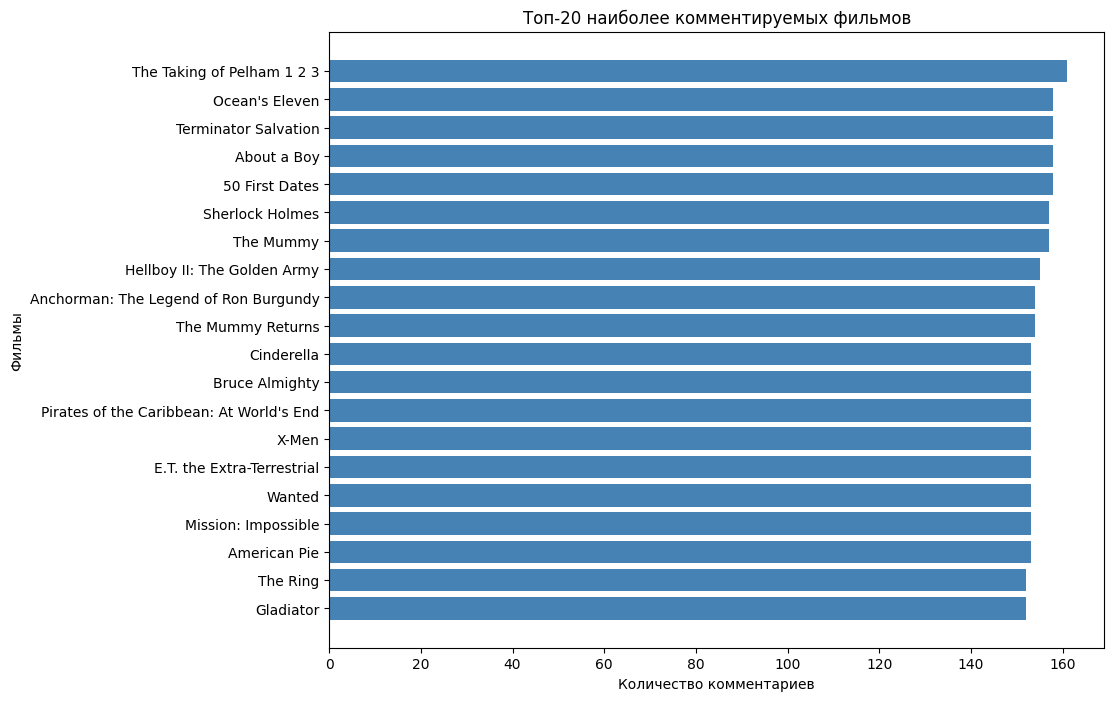

In [9]:
# Ваш код здесь
# Импортирование необходимых библиотек
import matplotlib.pyplot as plt

# Выводим на экран только первые 20 результатов
result_list = list()
for result in results[:20]:  # Используем срез списка для выбора первых 20 элементов
    result_list.append(result)
# Проверка выборки
print(len(result_list))
print(result_list)

# Извлечение названий фильмов и количества комментариев
titles = [res['title'] for res in result_list]
comments = [res['count'] for res in result_list]

# Создание горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 8))  # Установка размера фигуры
plt.barh(titles, comments, color='steelblue')  # Построение графика
plt.xlabel('Количество комментариев')  # Подпись оси X
plt.ylabel('Фильмы')  # Подпись оси Y
plt.title('Топ-20 наиболее комментируемых фильмов')  # Заголовок диаграммы
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы топовые фильмы были наверху
plt.show()  # Отображаем график